In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../corpus_sample/filtered_corpus.csv', usecols=['name', 'office_sought', 'party_affiliation', 'office_level', 'district_type', 'body_text', 'uid_email'])
pd.set_option('display.max_rows', None)
candidates = df.groupby(['name', 'office_sought', 'party_affiliation', 'office_level', 'district_type']).nunique()

In [4]:
threshold = 10
filtered_by_count = candidates.loc[candidates['uid_email'] >= threshold]
candidates = filtered_by_count.rename(columns={'uid_email': 'total_emails_sent'}, index={'Adair Ford Boroughs': 'Adair Boroughs', 'Anthony G. Brown': 'Anthony Brown', 'Carolyn B. Maloney': 'Carolyn Maloney', 'Chris Bubser': 'Christine Bubser', 'Christopher Jacobs': 'Chris Jacobs', 'Linda Sánchez': 'Linda Sanchez', })
candidates.to_csv('aggregate_candidate_info.csv')

In [5]:
candidates = pd.read_csv('aggregate_candidate_info.csv', index_col=0).reset_index()


In [6]:
gen_house_candidates = pd.read_csv('../gen_house_candidates.csv', index_col='candidate')
house_candidates = list(gen_house_candidates.index.values)
senate_candidates = {'Cindy Hyde-Smith': 'Mike Espy', 'Kelly Loeffler': 'Raphael Warnock', 'Lindsey Graham': 'Jaime Harrison', 'Bill Hagerty': 'Marquita Bradshaw', 'Gary Peters': 'John James'}

def find_opponent(name):
    if name in house_candidates:
        candidate_row = gen_house_candidates.loc[[name]]
        dist = candidate_row['district'].values[0]
        all_candidates = list(gen_house_candidates.loc[gen_house_candidates['district'] == dist].index.values)
        all_candidates.remove(name)
        if all_candidates:
            return all_candidates[0]
    elif name in senate_candidates:
        return senate_candidates[name]
    return 'none'
    

In [7]:
candidates['opponent'] = candidates['name'].apply(find_opponent)

In [8]:
black_house_candidates = pd.read_csv('../2020_black_house_candidates.csv', index_col=0)
black_candidates_list = list(black_house_candidates.index.values)

def opp_is_black(opponent):
    if opponent in black_candidates_list:
        return True
    return False
    

In [9]:
candidates['opp_is_black'] = candidates['opponent'].apply(opp_is_black)

In [10]:
candidates

,name,office_sought,party_affiliation,office_level,district_type,body_text,total_emails_sent,opponent,opp_is_black
0,Aaron Chatterji,North Carolina Treasurer,Democratic Party,State,State,36,36,none,False
1,Aaron Godfrey,U.S. House Ohio District 16,Democratic Party,Federal,Congress,41,42,Anthony Gonzalez,False
2,Aaron Lieberman,Arizona House of Representatives District 28,Democratic Party,State,State Legislative (Lower),15,15,none,False
3,Aaron Swisher,U.S. House Idaho District 2,Democratic Party,Federal,Congress,17,17,Mike Simpson,False
4,Abby Broyles,U.S. Senate Oklahoma,Democratic Party,Federal,State,268,306,none,False
5,Abigail Spanberger,U.S. House Virginia District 7,Democratic Party,Federal,Congress,260,260,Nick Freitas,False
6,Adair Boroughs,U.S. House South Carolina District 2,Democratic Party,Federal,Congress,256,269,Joe Wilson,False
7,Adam Bolanos Scow,U.S. House California District 20,Democratic Party,Federal,Congress,22,22,none,False
8,Adam Ericson,North Carolina House of Representatives Distri...,Democratic Party,State,State Legislative (Lower),71,72,none,False
9,Adam Hattersley,U.S. House Florida District 15,Democratic Party,Federal,Congress,118,137,none,False


In [14]:
keyword = 'crime'

keyword_emails = []

for index, row in df.iterrows():
    if keyword in str(row['body_text']):
        keyword_emails.append(row)
        
new_df = pd.DataFrame(keyword_emails)

In [11]:
# new_df

In [12]:
# new_df.at[4789, 'body_text']

In [15]:
candidate_emails = df.loc[df['name'] == 'Jo Jorgensen']
candidate_emails
keyword_count = 0
for index, row in candidate_emails.iterrows():
    if keyword in str(row['body_text']):
        keyword_count += 1
keyword_count

6

In [16]:
# def count_keyword(name, word):
#     candidate_emails = df.loc[df['name'] == name]
#     keyword_count = 0
#     for index, row in candidate_emails.iterrows():
#         if keyword in str(row['body_text']):
#             keyword_count += 1
#     return keyword_count

def count_keyword(name):
    candidate_emails = df.loc[df['name'] == name]
    keyword_count = 0
    for index, row in candidate_emails.iterrows():
        if keyword in str(row['body_text']):
            keyword_count += 1
    return keyword_count

corpus_candidates_list = list(candidates.index.values)
keyword = 'crime'
# for candidate in corpus_candidates_list:
#     count_keyword(candidate, keyword)
candidates['keyword_count'] = candidates['name'].apply(count_keyword)



In [17]:
candidates['keyword_proportion'] = candidates['keyword_count'] / candidates['total_emails_sent']

In [18]:
candidates

,name,office_sought,party_affiliation,office_level,district_type,body_text,total_emails_sent,opponent,opp_is_black,keyword_count,keyword_proportion
0,Aaron Chatterji,North Carolina Treasurer,Democratic Party,State,State,36,36,none,False,0,0.000000
1,Aaron Godfrey,U.S. House Ohio District 16,Democratic Party,Federal,Congress,41,42,Anthony Gonzalez,False,0,0.000000
2,Aaron Lieberman,Arizona House of Representatives District 28,Democratic Party,State,State Legislative (Lower),15,15,none,False,0,0.000000
3,Aaron Swisher,U.S. House Idaho District 2,Democratic Party,Federal,Congress,17,17,Mike Simpson,False,0,0.000000
4,Abby Broyles,U.S. Senate Oklahoma,Democratic Party,Federal,State,268,306,none,False,2,0.006536
5,Abigail Spanberger,U.S. House Virginia District 7,Democratic Party,Federal,Congress,260,260,Nick Freitas,False,0,0.000000
6,Adair Boroughs,U.S. House South Carolina District 2,Democratic Party,Federal,Congress,256,269,Joe Wilson,False,0,0.000000
7,Adam Bolanos Scow,U.S. House California District 20,Democratic Party,Federal,Congress,22,22,none,False,0,0.000000
8,Adam Ericson,North Carolina House of Representatives Distri...,Democratic Party,State,State Legislative (Lower),71,72,none,False,0,0.000000
9,Adam Hattersley,U.S. House Florida District 15,Democratic Party,Federal,Congress,118,137,none,False,0,0.000000


In [19]:
keyword_vs_race = candidates.groupby('opp_is_black')['keyword_proportion'].mean()

In [20]:
keyword_vs_race

opp_is_black
False    0.012542
True     0.024419
Name: keyword_proportion, dtype: float64

In [21]:
nonzero = candidates.loc[candidates['keyword_proportion'] > 0]
nonzero_keyword_vs_race = nonzero.groupby('opp_is_black')['keyword_proportion'].mean()
nonzero_keyword_vs_race

opp_is_black
False    0.038228
True     0.045785
Name: keyword_proportion, dtype: float64

([<matplotlib.axis.XTick at 0x7f775893fb50>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

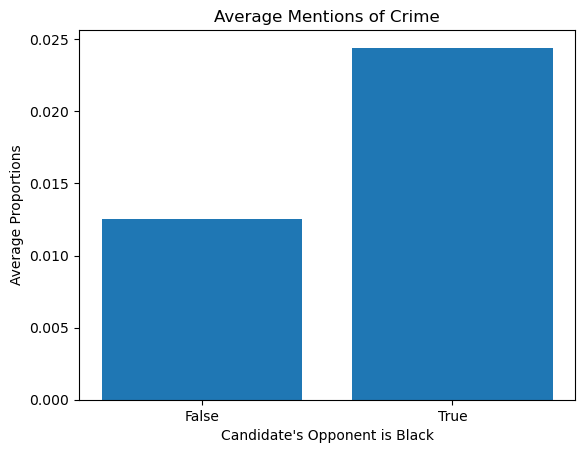

In [22]:
plt.bar(range(len(keyword_vs_race)), keyword_vs_race.values)
plt.xlabel("Candidate's Opponent is Black")
plt.ylabel("Average Proportions")
plt.title("Average Mentions of Crime")

plt.xticks(range(len(keyword_vs_race)), keyword_vs_race.index)